# Extended Data Figure 3

![title](../assets/EDFig3.png)

In [4]:
%load_ext autoreload
%autoreload 2

import sys
import logging
from pathlib import Path
from itertools import combinations

logging.getLogger("matplotlib.font_manager").disabled = True

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

import common

sys.path.append('./prepare_data')

DATA_PATH = Path(
    "../data"
)
EXPORT_PATH = Path(
    "../results/EDFigure3"
)
EXPORT_PATH.mkdir(exist_ok=True, parents=True)

FIGSIZE = {'width': 1.2, 'length': 0.9}

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Extended Data Figure 3: occupancy of antennal key points

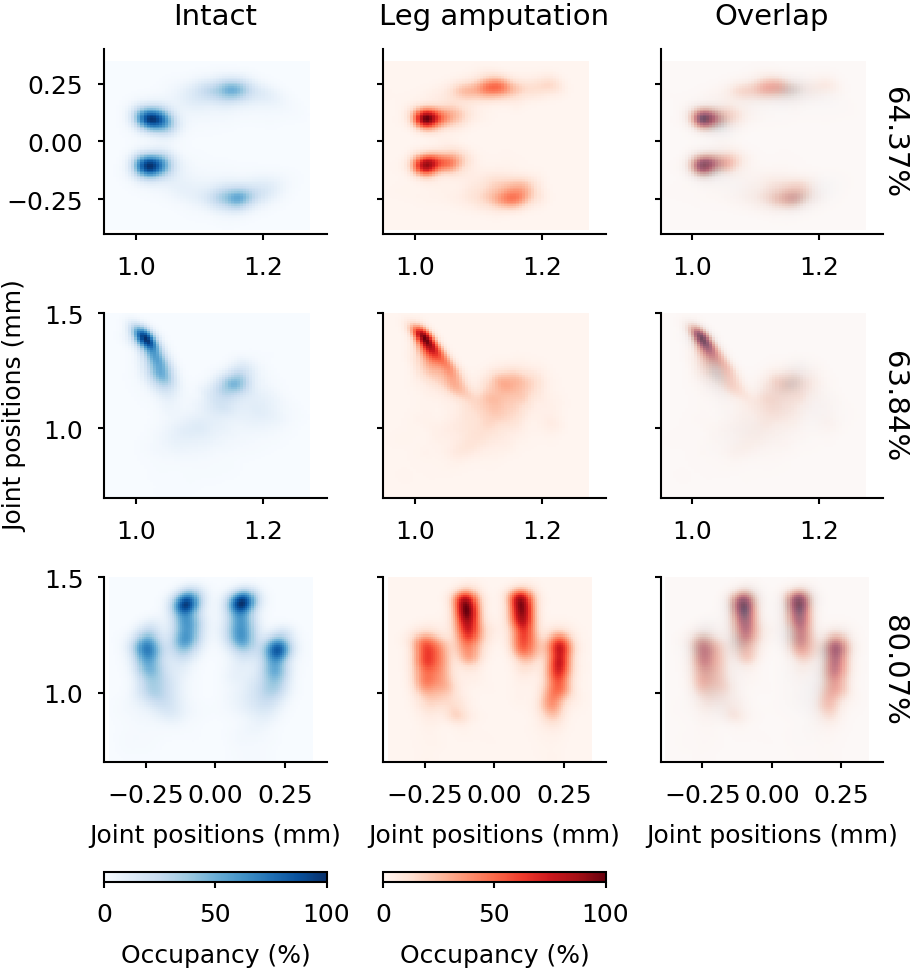

In [2]:
all_positions_intact = common.load_data(DATA_PATH / "EDFig3_intact.pkl")
all_positions_rlf = common.load_data(DATA_PATH / "EDFig3_RLF.pkl")

data_all = {}
boundaries = []


limits = {
    "x": [0.95, 1.3],
    "y": [-0.4, 0.4],
    "z": [0.7, 1.5],
}

joint_name = {
    "base": "antennal joint",
    "edge": "antennal tip",
    "Tarsus": "tibia-tarsus joint",
}

for x, y in combinations(["x", "y", "z"], 2):

    data1, data2 = common.convert_dict_to_array(
        all_positions_intact,
        all_positions_rlf,
        [
            f"Pose_R_head_Antenna_base_{x}",
            f"Pose_R_head_Antenna_edge_{x}",
            f"Pose_L_head_Antenna_base_{x}",
            f"Pose_L_head_Antenna_edge_{x}",
        ],
        [
            f"Pose_R_head_Antenna_base_{y}",
            f"Pose_R_head_Antenna_edge_{y}",
            f"Pose_L_head_Antenna_base_{y}",
            f"Pose_L_head_Antenna_edge_{y}",
        ],
    )
    kde1_vals, kde2_vals, x_g, y_g = common.calculate_kde(data1, data2)
    overlap = common.calculate_overlap(kde1_vals, kde2_vals)

    data_all[x + y] = (
        kde1_vals,
        kde2_vals,
        overlap,
        x_g,
        y_g,
        limits[x],
        limits[y],
    )

with plt.style.context("./config.mplstyle"):

    common.plot_2d_histograms_3x3(
        data_all,
        figsize=(3.1, 3.3),
        titles=[
            f"Intact",
            f"Leg amputation",
            f"Overlap",
            f"2D occupancy histograms of the head",
        ],
        export_path=EXPORT_PATH / "EDFigure3_Intact_RLF_antenna_2d_histograms.png",
    )